In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv("https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE")
products = pd.read_csv("https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0")
transactions = pd.read_csv("https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF")

In [7]:
# Preview datasets
print("Customers Data:")
print(customers.head())
print(customers.info())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [8]:
print("\nProducts Data:")
print(products.head())
print(products.info())


Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [9]:
print("\nTransactions Data:")
print(transactions.head())
print(transactions.info())


Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 n

In [10]:
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [11]:
# Convert date columns to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [12]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

In [13]:
# Feature Engineering
merged_data["Year"] = merged_data["TransactionDate"].dt.year
merged_data["Month"] = merged_data["TransactionDate"].dt.month
merged_data["SignupYear"] = merged_data["SignupDate"].dt.year
merged_data["AverageOrderValue"] = merged_data["TotalValue"] / merged_data["Quantity"]

In [14]:
# Save merged data to inspect
print("\nMerged Data Preview:")
print(merged_data.head())


Merged Data Preview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  Year  Month  \
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  2024      8

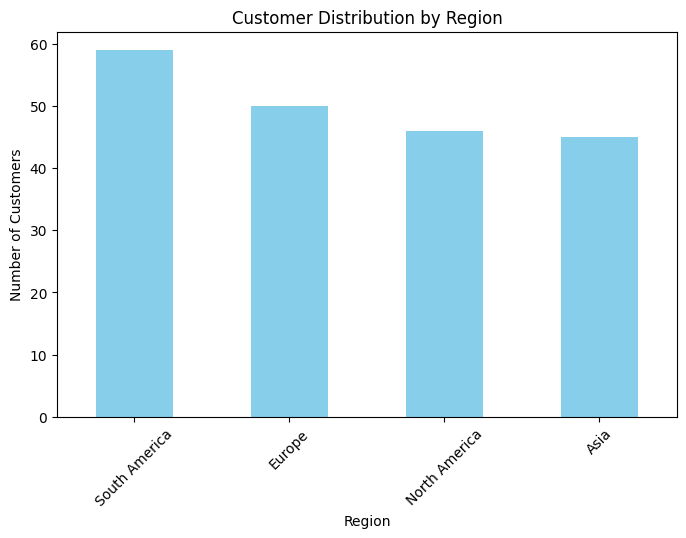

In [15]:
# 1. Customer distribution by region
customer_region_dist = customers["Region"].value_counts()
plt.figure(figsize=(8, 5))
customer_region_dist.plot(kind="bar", color="skyblue")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

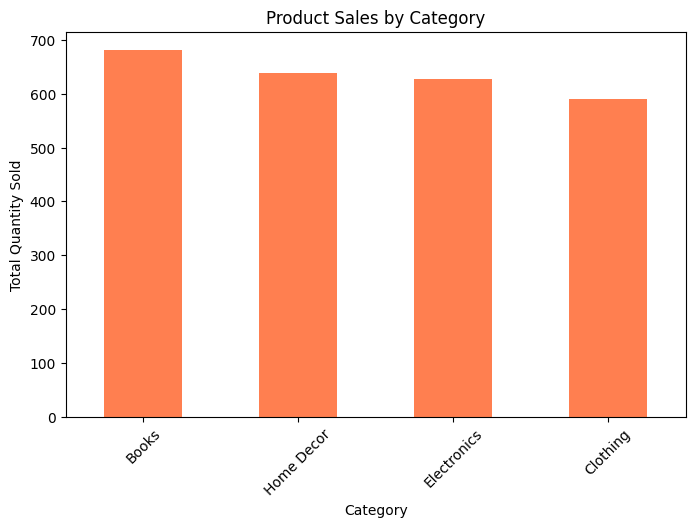

In [16]:
# 2. Product sales trends by category
category_sales = merged_data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind="bar", color="coral")
plt.title("Product Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


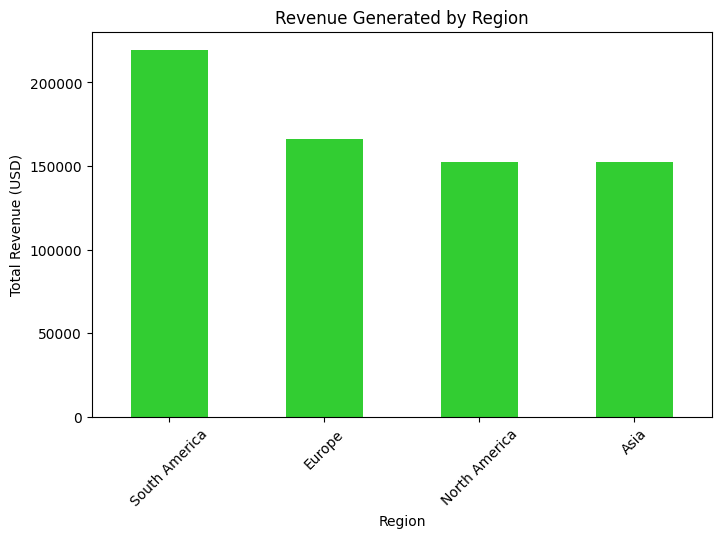

In [17]:
# 3. Revenue generated by region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind="bar", color="limegreen")
plt.title("Revenue Generated by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


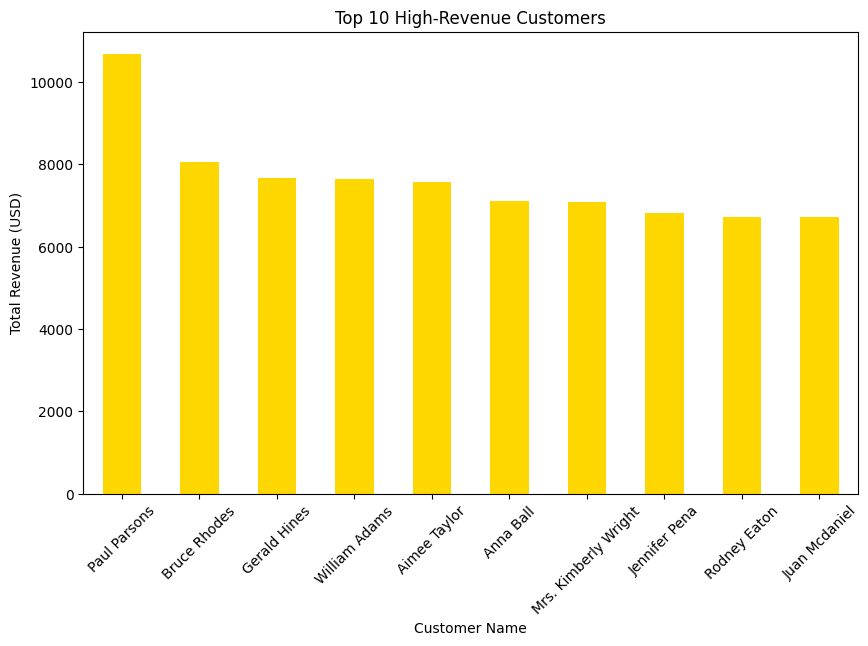

In [18]:
# 4. Top 10 high-revenue customers
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind="bar", color="gold")
plt.title("Top 10 High-Revenue Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


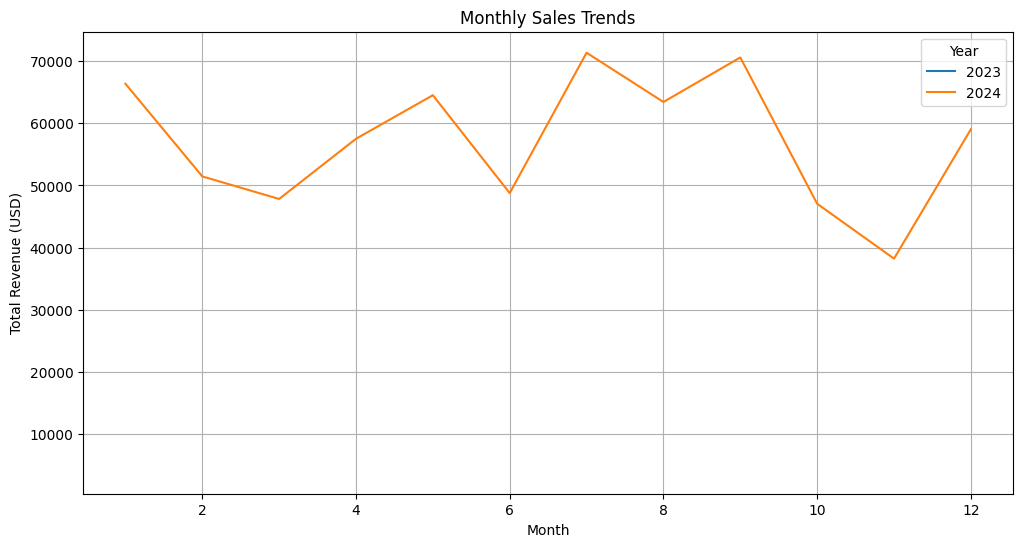

In [19]:
# 5. Monthly sales trends
monthly_sales = merged_data.groupby(["Year", "Month"])["TotalValue"].sum().unstack(level=0)
monthly_sales.plot(figsize=(12, 6))
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.legend(title="Year")
plt.grid()
plt.show()

In [26]:
# Derive Insights
print("\nBusiness Insights:")
print("1. Region South America generates the highest revenue, contributing significantly to the overall sales. Focus marketing efforts here.")
print("2. The Books category has the highest sales volume, suggesting an opportunity for upselling related products.")
print("3. Sales spike during Q3, aligning with holiday shopping trends. Seasonal promotions can further boost revenue.")


Business Insights:
1. Region South America generates the highest revenue, contributing significantly to the overall sales. Focus marketing efforts here.
2. The Books category has the highest sales volume, suggesting an opportunity for upselling related products.
3. Sales spike during Q3, aligning with holiday shopping trends. Seasonal promotions can further boost revenue.
